In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
raw_data = pd.read_csv('cleansed_data//all_consumption_metadata.csv', index_col=1, parse_dates=True,
                      dtype={'loc_id':'str', 'consumption_kvah':'float32', 'temperature':'float32', 
                             'el_price':'float32', 'oil_price':'float32'})
raw_data.head()

,time,consumption_kvah,temperature,el_price,oil_price
loc_id,,,,,
0,2018-01-01 00:00:00,27.0,5.5,258.010010,543.415771
0,2018-01-01 01:00:00,27.5,5.0,258.989990,543.415771
0,2018-01-01 02:00:00,27.0,4.8,255.750000,543.415771
0,2018-01-01 03:00:00,23.0,4.9,242.039993,543.415771
0,2018-01-01 04:00:00,23.0,3.7,242.429993,543.415771


# Create Cube

In [70]:
mean = raw_data.groupby(by=raw_data.index).mean()
mean_relative = mean / mean.max()
mean['type'] = 'Mean'
mean_relative['type'] = 'Mean relative'


std = raw_data.groupby(by=raw_data.index).std()
std_relative = std / std.max()
std['type'] = 'Std. dev'
std_relative['type'] = 'Std dev. relative'

In [71]:
gathered = std.append([mean, mean_relative, std_relative])
gathered = gathered.set_index([gathered.index, 'type']).sort_index()

In [72]:
gathered

consumption_kvah  temperature    el_price  \
loc_id type                                                           
0      Mean                      20.195847     8.746522  393.237396   
       Mean relative              0.096281     0.865741    0.978592   
       Std dev. relative          0.077496     0.844068    0.961574   
       Std. dev                   9.052362     7.654556   92.334106   
1      Mean                     119.512169     8.989892  393.237396   
       Mean relative              0.569759     0.889830    0.978592   
       Std dev. relative          0.442258     0.725734    0.961574   
       Std. dev                  51.660439     6.581426   92.334106   
2      Mean                      47.896240     9.877562  401.638031   
       Mean relative              0.228339     0.977692    0.999498   
       Std dev. relative          0.162260     0.784528    0.976413   
       Std. dev                  18.953646     7.114612   93.759018   
3      Mean                      10.825320     7.599559  393.237396   
       Mean relative              0.051608     0.752213    0.978592   
       Std dev. relative          0.043631     0.873592    0.961574   
       Std. dev                   5.096538     7.922300   92.334106   
4      Mean                      64.954575     2.363075  393.237396   
       Mean relative              0.309663     0.233900    0.978592   
       Std dev. relative          0.377358     0.931654    0.961574   
       Std. dev                  44.079361     8.448840   92.334106   
5      Mean                      29.464893     8.263903  401.839844   
       Mean relative              0.140470     0.817971    1.000000   
       Std dev. relative          0.127626     0.802949    1.000000   
       Std. dev                  14.908084     7.281664   96.023926   
6      Mean                      26.856598     7.963656  393.237396   
       Mean relative              0.128035     0.788252    0.978592   
       Std dev. relative          0.098935     0.880032    0.961574   
       Std. dev                  11.556611     7.980699   92.334106   
7      Mean                     155.790237     7.145519  393.497314   
       Mean relative              0.742710     0.707272    0.979239   
...                                    ...          ...         ...   
12     Std dev. relative          0.557562     0.725734    0.961574   
       Std. dev                  65.129150     6.581426   92.334106   
13     Mean                     209.759094    10.102935  334.456177   
       Mean relative              1.000000     1.000000    0.832312   
       Std dev. relative          0.390985     0.713383    0.723986   
       Std. dev                  45.671112     6.469422   69.520012   
14     Mean                      30.562767     9.934552  400.084503   
       Mean relative              0.145704     0.983333    0.995632   
       Std dev. relative          0.113482     0.784327    0.988954   
       Std. dev                  13.255836     7.112782   94.963280   
15     Mean                       9.606439     8.301257  390.960999   
       Mean relative              0.045797     0.821668    0.972927   
       Std dev. relative          0.032523     0.667100    0.993442   
       Std. dev                   3.799068     6.049692   95.394188   
16     Mean                      21.003609     9.016852  393.237396   
       Mean relative              0.100132     0.892498    0.978592   
       Std dev. relative          0.074935     0.637101    0.961574   
       Std. dev                   8.753213     5.777647   92.334106   
17     Mean                      18.959200     4.903894  393.237396   
       Mean relative              0.090386     0.485393    0.978592   
       Std dev. relative          0.069871     0.869414    0.961574   
       Std. dev                   8.161711     7.884404   92.334106   
18     Mean                      50.231163     8.890617  393.237396   
       Mean relative              0.239471     0.8

# Create visualizations

In [95]:
raw_data = pd.read_csv('cleansed_data//all_consumption_metadata.csv', index_col=0, parse_dates=True,
                      dtype={'loc_id':'str', 'consumption_kvah':'float32', 'temperature':'float32', 
                             'el_price':'float32', 'oil_price':'float32'})
raw_data.head()

,loc_id,consumption_kvah,temperature,el_price,oil_price
time,,,,,
2018-01-01 00:00:00,0,27.0,5.5,258.010010,543.415771
2018-01-01 01:00:00,0,27.5,5.0,258.989990,543.415771
2018-01-01 02:00:00,0,27.0,4.8,255.750000,543.415771
2018-01-01 03:00:00,0,23.0,4.9,242.039993,543.415771
2018-01-01 04:00:00,0,23.0,3.7,242.429993,543.415771


In [135]:
raw_data.shape

(329875, 5)

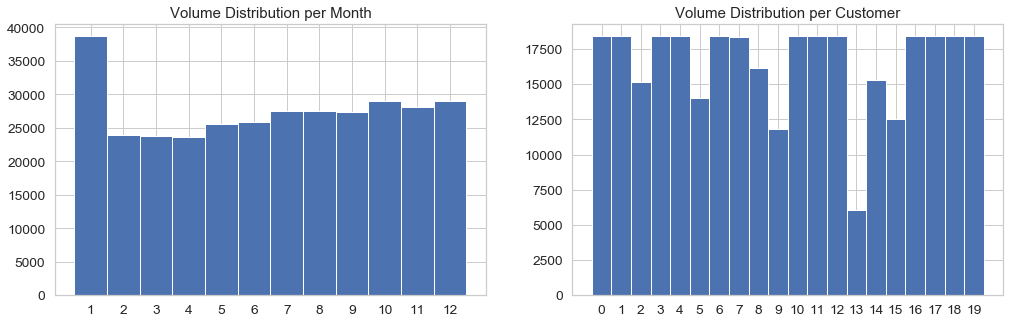

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(17,5))
ax[0].hist(raw_data.index.month, bins=np.arange(1,14)-0.5)
ax[0].set_title('Volume Distribution per Month')
ax[0].set_xticks([i for i in range(1, 13)])
ax[1].hist(raw_data['loc_id'].astype('int').to_frame().sort_values('loc_id').loc_id, bins=np.arange(21)-0.5)
ax[1].set_xticks([i for i in range(20)])
ax[1].set_title('Volume Distribution per Customer')
plt.show()

## Group by month. Calculate max and min el prices separately.
...Because some customers' time series may only include a subset of the price time series available to others.

In [96]:
grped = raw_data.groupby(by=[raw_data.index.month]).mean()
el_mx, el_mn = (max(grped['el_price']), min(grped['el_price']))
oil_mx, oil_mn = (max(grped['oil_price']), min(grped['oil_price']))

In [97]:
grped = raw_data[['consumption_kvah', 'temperature', 'loc_id', 'oil_price', 'el_price']].groupby(by=['loc_id', raw_data.index.month]).mean()
grped['el_price'] = (grped['el_price'] - el_mn) / (el_mx-el_mn)
grped['oil_price'] = (grped['oil_price'] - oil_mn) / (oil_mx-oil_mn)

## Normalize consumption and temperature for every customer.

In [77]:
app = pd.DataFrame(columns=['consumption_kvah', 'temperature', 'oil_price', 'el_price', 'month', 'loc_id'])
normalize_features = ['consumption_kvah', 'temperature']

i = 0

for l in grped.index.get_level_values(0).unique(): 
    temp = grped.loc[l].copy()
    temp['month'] = temp.index
    temp['loc_id'] = l
    n = len(temp)
    temp.index = (range(i, i+n))
    
    for f in normalize_features:
        mx, mn = (max(temp[f]), min(temp[f]))
        temp[f] = (temp[f] - mn) / (mx-mn)
    app = app.append(temp)
    i += n

In [81]:
app.head()

,consumption_kvah,temperature,oil_price,el_price,month,loc_id
0,0.890211,0.064266,0.110354,0.159064,1,0
1,1.000000,0.000000,-0.031846,0.427541,2,0
2,0.897260,0.045842,0.103042,0.576633,3,0
3,0.522859,0.361523,0.603109,0.356902,4,0
4,0.216635,0.675977,0.996881,-0.008772,5,0


In [82]:
grped.head()

consumption_kvah  temperature  oil_price  el_price
loc_id time                                                    
0      1            28.345020     2.286246   0.110354  0.159064
       2            30.551758     1.111058  -0.031846  0.427541
       3            28.486712     1.949328   0.103042  0.576633
       4            20.961309     7.721944   0.603109  0.356902
       5            14.806260    13.472110   0.996881 -0.008772

## ...And visualize

In [83]:
import seaborn as sns
from matplotlib import rcParams
rcParams["legend.markerscale"] = 2.5

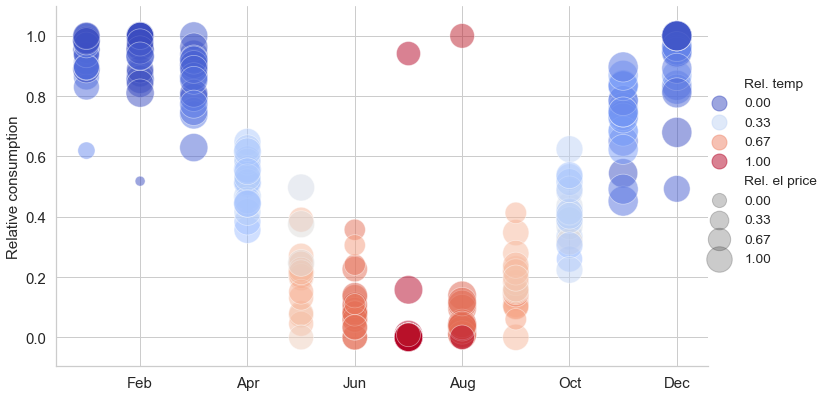

In [84]:
tp = app.sort_values('loc_id')
sns.set(font_scale=1.25)
sns.set_style("whitegrid")

g = sns.relplot(x="month", y="consumption_kvah",
                     hue="temperature",
                     hue_norm=(0,1),
                     palette='coolwarm',
                     sizes=(100,900),
                     size="el_price",
                     alpha=0.5,
                     height=6,
                     aspect=1.7,
                     legend='brief',
                     kind='scatter',
                     edgecolor='White',
                     data=tp)

g._legend.set_title("")
g._legend.set_bbox_to_anchor([0.98, 0.5])  # coordinates of lower left of bounding box
g._legend._loc = 5
new_labels = ['Rel. temp    ', '0.00', '0.33', '0.67', '1.00',
             'Rel. el price   ', '0.00', '0.33', '0.67', '1.00', '']

j = 0
for i, (t, h, l) in enumerate(zip(g._legend.texts, g._legend.legendHandles, new_labels)): 
    t.set_text(l)
    h.set_alpha(0.5)
    
    if i > 5: 
        h.set_alpha(0.25)
        h._sizes = [200 + j*150]
        j += 1
    if i > 9:
        h.set_alpha(0)
        
g.set(facecolor='white')

#plt.title('Mean relative power consumption per month for each sample customer', size=17)
plt.ylabel('Relative consumption', size=15)
plt.xlabel('', size=15)
plt.yticks(size=15)
plt.xticks(ticks=[i for i in range(2,13,2)], labels=['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'], size=15)
plt.grid(True, axis='both')
#g.savefig('figures\\data_cube_month.png', pad_inces=-5, transparent=True)
plt.show()

# Check out oil prices and el prices

In [85]:
op = pd.read_csv('cleansed_data//Oilspot_prices.csv', parse_dates=True, index_col=0, dtype='float32')
op.columns = ['price_oil']
op['day'] = op.index.date

ep = pd.read_csv('cleansed_data//Elspot_prices.csv', parse_dates=True, index_col=0, dtype='float32')
ep.columns = ['price_el']
ep['day'] = ep.index.date

In [86]:
op_ep = op.merge(ep.groupby('day').mean(), how='inner', left_on='day', right_index=True).drop('day', axis=1)

In [87]:
op_ep.head()

,price_oil,price_el
2018-01-01,543.415771,255.162506
2018-01-02,542.764282,311.529999
2018-01-03,552.407532,276.988342
2018-01-04,556.864197,311.562927
2018-01-05,549.758850,304.326263


In [88]:
#op_ep.to_csv('cleansed_data//oil_el.csv')

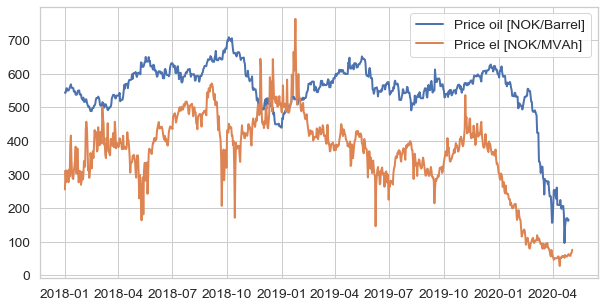

In [90]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(op_ep.price_oil, lw=2, label='Price oil [NOK/Barrel]')
ax.plot(op_ep.price_el, lw=2, label='Price el [NOK/MVAh]')
ax.legend()
plt.show()

## Relative to one another: $el prices / oil prices$ per month

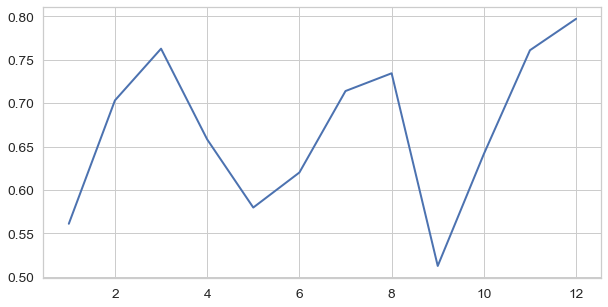

In [93]:
grouped = op_ep.groupby(op_ep.index.month).median()
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(grouped.price_el / grouped.price_oil, lw=2)
plt.show()

## The following figure (made for front page) can be achieved by doing the previous steps, but resample by weeks

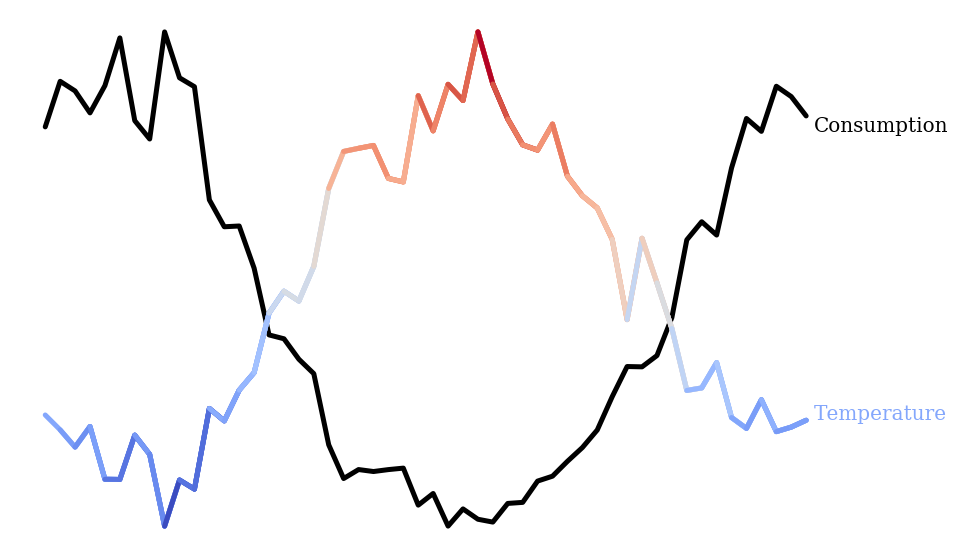

In [22]:
sub = app[app['loc_id']=='18']

rcParams['font.family'] = 'serif'
fig, ax = plt.subplots(1,1, figsize=(15,10))

ax.plot(sub.consumption_kvah, lw=5, c='black')

colors = plt.cm.coolwarm(sub.temperature)
for i in range(len(sub)): ax.plot(sub.iloc[i:i+5].temperature, lw=5, c=colors[i])

for line, name in zip(ax.lines, ['Consumption', 'Temperature']):
    y = line.get_ydata()[0]
    ax.annotate(name, xy=(1,y), xytext=(-30,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=20, va="center")
    
ax.axis('off')
fig.figsize = (20,10)
fig.savefig('figures\\front.png', pad_inces=-5, transparent=True)
plt.show()